In [1]:
import numpy as np
import argparse
import cv2
import os

In [15]:
original =  cv2.imread('C:\\Users\Cheon\MasterData\mClose\sbv536.png'
                 );

In [16]:
cv2.imshow('color image',original) 
cv2.waitKey(0); cv2.destroyAllWindows(); cv2.waitKey(1)

-1

In [17]:
width = 512
height = 512
dim = (width, height)
 
# resize image
resized = cv2.resize(original, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Resized Dimensions :  (512, 512, 3)


In [35]:
# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'

#sa values
#lower = np.array([60, 50, 20], dtype = "uint8")
#upper = np.array([200, 255, 255], dtype = "uint8")

#sb values
#lower = np.array([90, 30, 20], dtype = "uint8")
#upper = np.array([180, 255, 200], dtype = "uint8")

#sc values
#lower = np.array([30, 5,0], dtype = "uint8")
#upper = np.array([180, 255, 160], dtype = "uint8")

#sd values
#lower = np.array([20, 20, 100], dtype = "uint8")
#upper = np.array([180, 255, 200], dtype = "uint8")

#se values
#lower = np.array([90, 70, 70], dtype = "uint8")
#upper = np.array([180, 255, 255], dtype = "uint8")

#sf values
#lower = np.array([60, 60, 60], dtype = "uint8")
#upper = np.array([180, 255, 255], dtype = "uint8")

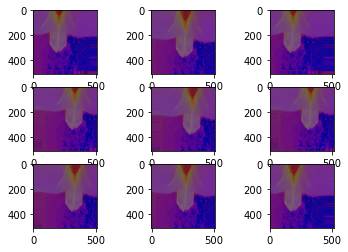

In [41]:
converted = cv2.cvtColor(resized, cv2.COLOR_RGB2HSV)
blur = cv2.blur(converted,(5,5))
data = img_to_array(converted)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-20,20],height_shift_range=0.2)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
    

In [37]:
skinMask = cv2.inRange(converted, lower, upper)
cv2.imshow('result', skinMask)
cv2.waitKey()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
# apply a series of erosions and dilations to the mask
# using an elliptical kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
skinMask = cv2.erode(skinMask, kernel, iterations = 2)
skinMask = cv2.dilate(skinMask, kernel, iterations = 5)
skin = cv2.bitwise_and(resized, resized, mask = skinMask)
# show the skin in the image along with the mask
cv2.imshow("images", skinMask)

# show the skin in the image along with the mask
#cv2.imshow("Mask image", skinMask)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [39]:
#Test (NOT WORKING) for further shadow removal by taking only larges contour
output = skin
contours, hierarchy = cv2.findContours(skinMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
blank_mask = np.zeros(output.shape, dtype=np.uint8)

if len(contours) != 0:
    # draw in blue the contours that were founded

    # find the biggest countour (c) by the area
    c = max(contours, key = cv2.contourArea)
    
    cv2.fillPoly(blank_mask, [c], (255,255,255))


# show the images
cv2.imshow("Result", blank_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [12]:
#Function to convert images to mask 
#Manually set lower and upper boundaries depending on the userclass
#No one size fit all method

import numpy as np
import argparse
import cv2
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot


def massconvert(imageDir,filename,saveDir):
    original =  cv2.imread(imageDir);
    width = 512
    height = 512
    dim = (width, height)

    # resize image
    resized = cv2.resize(original, dim, interpolation = cv2.INTER_AREA)

    # define the upper and lower boundaries of the HSV pixel
    # intensities to be considered 'skin'
    lower = np.array([60, 60, 60], dtype = "uint8")
    upper = np.array([180, 255, 255], dtype = "uint8")


    converted = cv2.cvtColor(resized, cv2.COLOR_RGB2HSV)
    
    #DATA AUGMENTATION LOOP
    data = img_to_array(converted)
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # create image data augmentation generator
    datagen = ImageDataGenerator(width_shift_range=[-100,100],height_shift_range=0.3)
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(3):
        # define subplot
        pyplot.subplot(330 + 1 + i)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        # plot raw pixel data
        pyplot.imshow(image)
        skinMask = cv2.inRange(converted, lower, upper)
        # apply a series of erosions and dilations to the mask
        # using an elliptical kernel
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        skinMask = cv2.erode(skinMask, kernel, iterations = 3)
        skinMask = cv2.dilate(skinMask, kernel, iterations = 5)
        skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)

        cv2.imwrite(saveDir + '\\AUGPR' + str(i) + filename , skinMask)
        #print(saveDir + '\\PR' + filename)


In [13]:
#Function to loop through the subdirectory andd convert all images matching prefix(which indicatesa a certain user's feet type)
def conversionLoop(mainDir,subdirectory,prefix):
    print('Executing loop' + subdirectory + ' PREFIX: ' + prefix)
    import os, re
    pfName = mainDir + subdirectory
    for i in os.listdir(pfName):
        #rint(os.path.join(pfName,i))
        if os.path.isfile(os.path.join(pfName,i)) and i.startswith(prefix):
            #print(pfName)
            massconvert(os.path.join(pfName,i),i,pfName)
            #print(os.path.join(pfName,i))
   

Executing loopmClose PREFIX: sf
Starting
Executing loopmLForward PREFIX: sf
Starting
Executing loopmLTurn PREFIX: sf
Starting
Executing loopmLUp PREFIX: sf
Starting
Executing loopmNeutral PREFIX: sf
Starting
Executing loopmPointIn PREFIX: sf
Starting
Executing loopmPointOut PREFIX: sf
Starting
Executing loopmRForward PREFIX: sf
Starting
Executing loopmRTurn PREFIX: sf
Starting
Executing loopmRUp PREFIX: sf
Starting
operation Complete


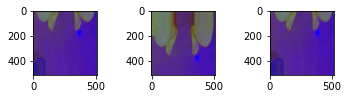

In [14]:
#Execute conversion loop in all subdirectories
dirList = ['mClose','mLForward','mLTurn','mLUp','mNeutral','mPointIn','mPointOut','mRForward','mRTurn','mRUp']
for i in dirList:
    conversionLoop('C:\\Users\Cheon\MasterData\\' ,i,'sf')
    print('Starting')
print('operation Complete')

In [6]:
for root, subdirectories, files in os.walk(directory):
    for subdirectory in subdirectories:
        print(subdirectory)

NameError: name 'directory' is not defined

In [ ]:
#Test for auto skin thresholding using foot-at-center as example


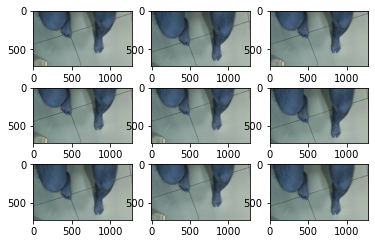

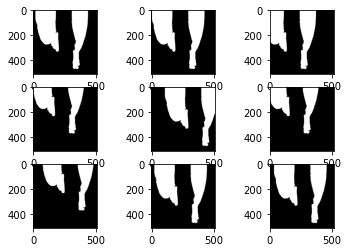

In [317]:
#Data augmentation Segment
#Model Training Segment
# example of horizontal shift image augmentation
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = cv2.imread('C:\\Users\Cheon\MasterData\mLForward\PRsfn52.png');
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-50,50],height_shift_range=0.2)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [3]:
#Moddel training section begin
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
data_dir = "C:\\Users\Cheon\MasterData"
data_dir = pathlib.Path(data_dir)

NameError: name 'pathlib' is not defined

In [ ]:
from tqdm import tqdm
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import cv2
import numpy as np
import pandas as pd
classes = {'mClose':0,'mLForward':1,'mLTurn':2,'mNeutral':3,'mPointIn':4,'mPointOut':5,'mRForward':6,'mRTurn':7}
mClose_DIR='C:\\Users\Cheon\MasterData\mClose'
mLForward_DIR='C:\\Users\Cheon\MasterData\mLForward'
mLTurn_DIR ='C:\\Users\Cheon\MasterData\mLTurn'
nNeutral_DIR ='C:\\Users\Cheon\MasterData\mNeutral'
mPointIn_DIR ='C:\\Users\Cheon\MasterData\mPointIn'
mPointOut_DIR ='C:\\Users\Cheon\MasterData\mPointOut'
mRForward_DIR ='C:\\Users\Cheon\MasterData\mRForward'
mRTURN_DIR ='C:\\Users\Cheon\MasterData\mRTurn'


def assign_label(img,gest_type):
    return gest_type

X = []
y = []

def make_data(gest_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,gest_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path)
        X.append(np.array(img))
        y.append(str(label))

In [4]:
make_data(classes.get('mClose'), mClose_DIR)
make_data(classes.get('mLForward'), mLForward_DIR)
make_data(classes.get('mLTurn'), mLTurn_DIR)


100%|███████████████████████████████████████████████████████████████████████████████| 515/515 [00:03<00:00, 141.30it/s]


In [6]:
len(y)
y = np.array(y)
y.shape

(1858,)

In [14]:
len(X)
X = np.array(X)
X.shape

(1858,)

In [5]:
import splitfolders
import splitfolders
splitfolders.ratio('C:\\Users\Cheon\MasterData', output="C:\\Users\Cheon\MasterData\mClose", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 6380 files [00:20, 317.81 files/s]


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [11]:
batch_size = 8
data_dir = 'C:\\Users\Cheon\MasterData\ktraining'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  batch_size=batch_size)

Found 5799 files belonging to 8 classes.
Using 4640 files for training.
Found 5799 files belonging to 8 classes.
Using 1159 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['mClose', 'mLForward', 'mLTurn', 'mNeutral', 'mPointIn', 'mPointOut', 'mRForward', 'mRTurn']
